# Project Titanic


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('train Titanic.csv')
test_df=pd.read_csv("test Titanic.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#####  Notes
- `SibSp` : number of siblings/ spouses aboard the Titanic
- `Parch` : number of parents/ children aboard the Titanic
- `Ticket` : Ticket number
- `Cabin` : Cabin number

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId,inplace=True)

In [7]:
train_df.drop("PassengerId",axis=1,inplace= True)

In [8]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df=pd.read_csv("test Titanic.csv",index_col="PassengerId")

In [10]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###  Feature Classification : Categorical vs Numerical [Bien phan loai & Bien so]
##### Which features are categorical
- Categorical :`nominal`,`ordinal`,`ratio`,`interval`
- To classify the samples into sets of similar samples

##### Which features are numerical
- Numerical features : `discrete`, `continuous` or `timeseries`
- These vales change from sample to sample

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical `Survived`,`Sex`,`Embarked`,`Pclass` (ordinal),`SibSp`,`Parch`
- Numerical :(continuous) `Age`,`Fare`,(discrete)
- Mix types of data : `Ticket`, `Cabin`
- Contain Error/typo `Name`
- Blank or Null : `Cabin` > `Age` > `Embarked`
- Various Data Type: String, Int, Float

In [13]:
train_df["Survived"]= train_df["Survived"].astype("category")

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [15]:
converted_features=["Pclass",'Sex','SibSp','Parch','Embarked']
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df,converted_features)
convert_cat(test_df,converted_features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [18]:
train_df.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


##  2. Exploratory Data Analysis (EDA)    - Khai pha du lieu 
#### Target Variable : Survived

In [19]:
train_df["Survived"].value_counts().to_frame()


,Survived
0,549
1,342


In [20]:
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


###  `Sex`

In [21]:
train_df['Sex'].value_counts().to_frame()

,Sex
male,577
female,314


In [22]:
train_df['Sex'].value_counts(normalize=True).to_frame()

,Sex
male,0.647587
female,0.352413


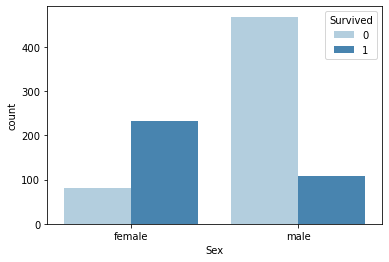

In [23]:
sns.countplot(data=train_df,x='Sex',hue='Survived',palette="Blues");

- Remaining Categorical Feature Columns

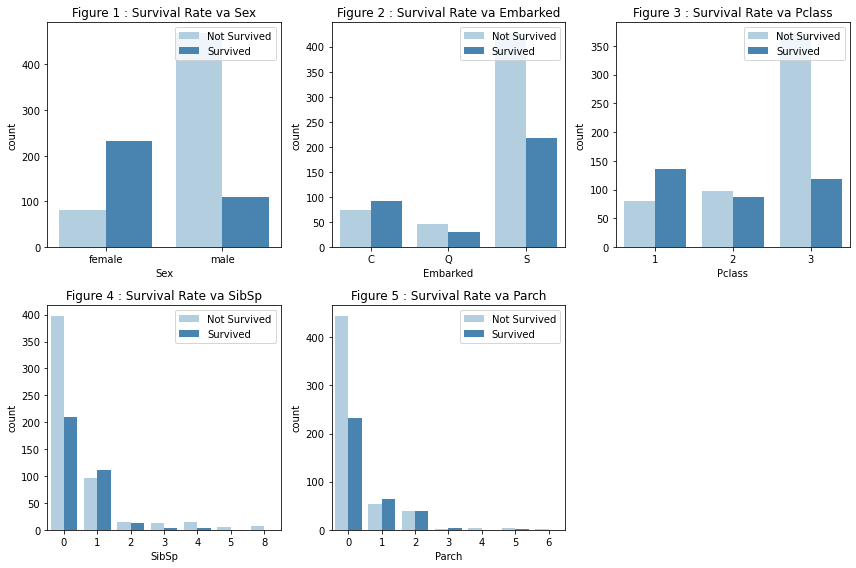

In [31]:
cols= ['Sex','Embarked','Pclass','SibSp','Parch']
n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols,figsize=[n_cols*4,n_rows*4])

for r in range (0, n_rows):
    for c in range(0, n_cols):
        i=r*n_cols +c   #index to loop through list [cols]
        if i<len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue='Survived',palette="Blues",ax=ax_i)
            ax_i.set_title(f'Figure {i+1} : Survival Rate va {cols[i]}')
            ax_i.legend(title='',loc="upper right",labels=["Not Survived","Survived"])

ax.flat[-1].set_visible(False) # remove the last subplot
plt.tight_layout()
plt.show()

### EDA for Numerical Feature

##### `Age`

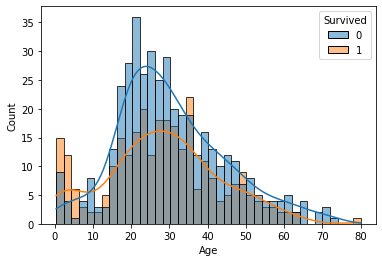

In [25]:
sns.histplot(data=train_df,x='Age',hue="Survived",bins=40,kde=True);

#####  `Fare`

In [26]:
train_df["Fare"].describe().to_frame()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


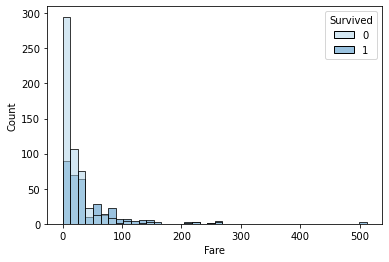

In [27]:
sns.histplot(data=train_df,x="Fare",hue='Survived',palette="Blues",bins=40);

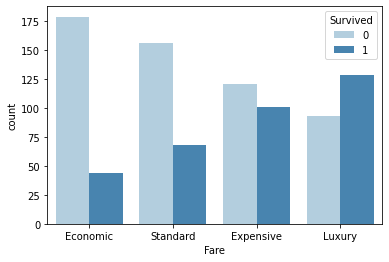

In [28]:
#To name for 0-25%,25-50,50-75,75-100
fare_categories =['Economic','Standard','Expensive','Luxury']
quartile_data=pd.qcut(train_df["Fare"],4,labels=fare_categories)

sns.countplot(x=quartile_data, hue=train_df['Survived'], palette="Blues");

In [29]:
train_df['Fare'].to_frame()

,Fare
PassengerId,
1,7.2500
2,71.2833
3,7.9250
4,53.1000
5,8.0500
...,...
887,13.0000
888,30.0000
889,23.4500
